Importer pakker

In [27]:
from os.path import join as pjoin

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

Plot funktioner

In [28]:
def plot_fft(fft_result, frequency, title_of_diagram):
    plt.figure(figsize=(12, 6))
    plt.title(title_of_diagram)
    plt.xlabel("Frekvens [Hz]")
    plt.ylabel("Amplitude")
    plt.xlim(0, 1000)
    plt.xticks(np.arange(0, 1000, step=25), rotation=60)
    plt.plot(frequency[:n], np.abs(fft_result[:n]))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, axis='both')

    plt.show()

Sti til lyd og hent lyd

In [30]:
path_to_audio = "../data/trimmed/"
neck_sample_rate, neck_audio_data = wavfile.read(pjoin(path_to_audio, "rev_n_14_262144.wav"))
bridge_sample_rate, bridge_audio_data = wavfile.read(pjoin(path_to_audio, "rev_b_14_262144.wav"))
mid_sample_rate, mid_audio_data = wavfile.read(pjoin(path_to_audio, "rev_mid_14_262144.wav"))

FFT af lydklip + graf

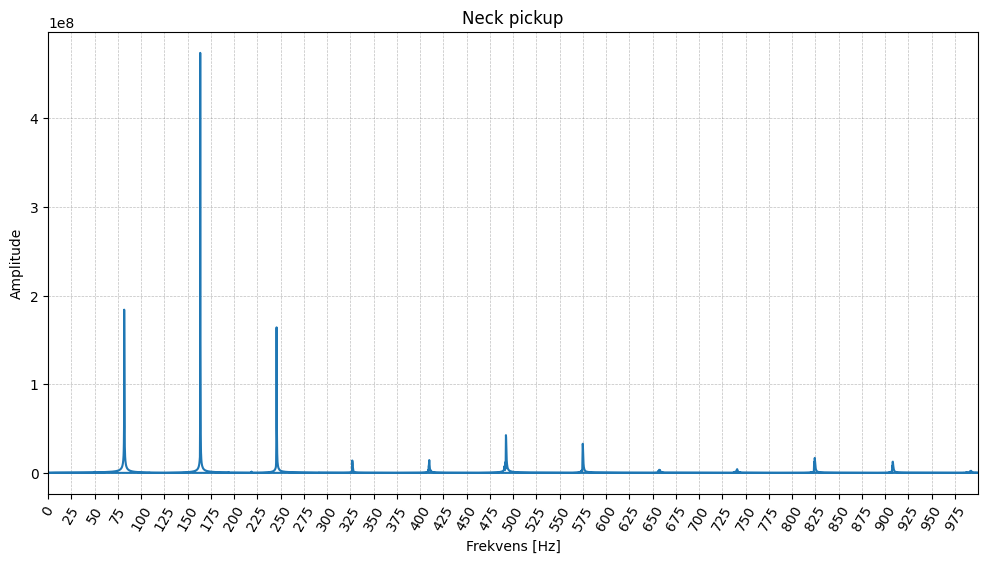

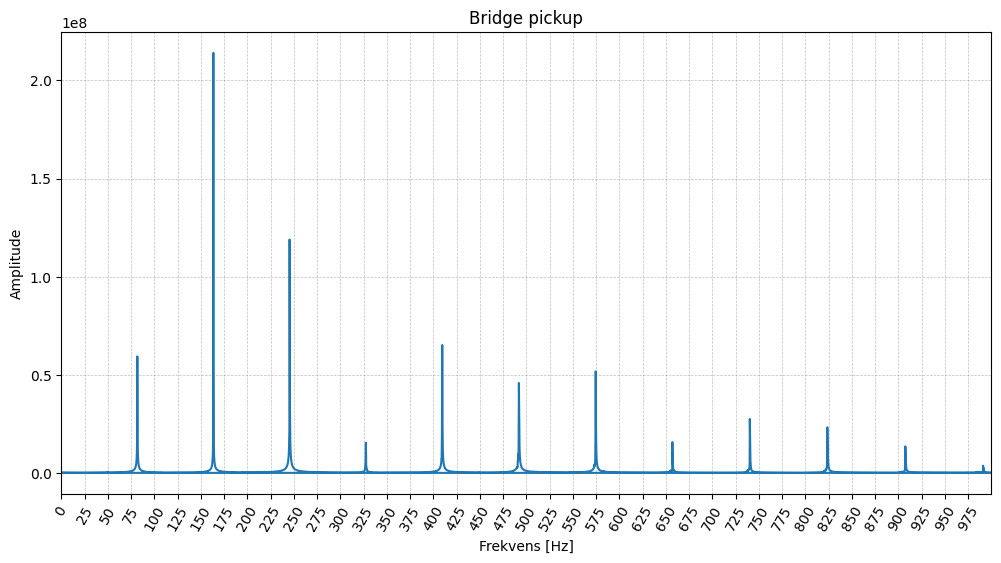

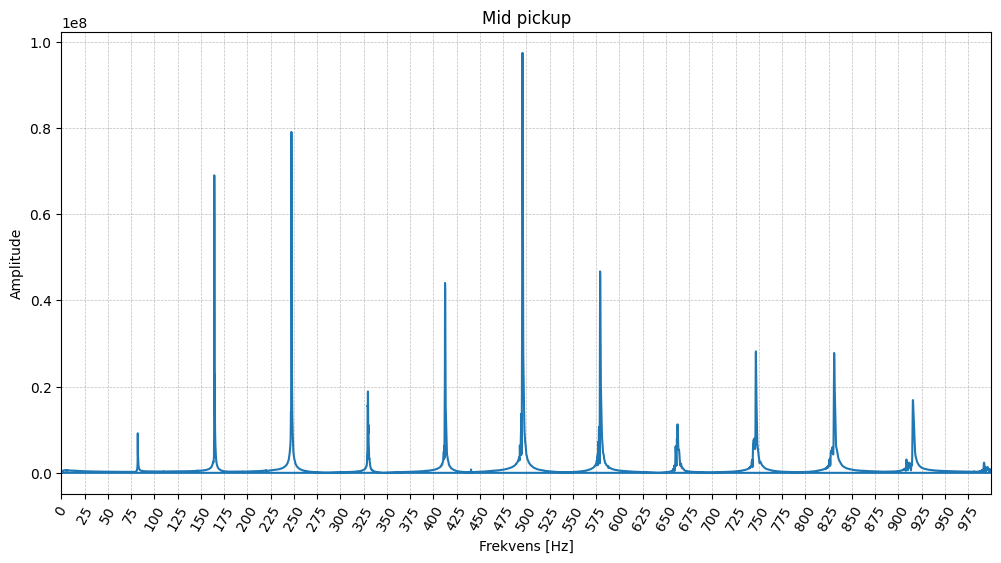

In [31]:
fft_neck = np.fft.fft(neck_audio_data)
fft_bridge = np.fft.fft(bridge_audio_data)
fft_mid = np.fft.fft(mid_audio_data)
n = len(neck_audio_data)
frequency = np.fft.fftfreq(n, 1 / neck_sample_rate)
plot_fft(fft_neck, frequency, "Neck pickup")
plot_fft(fft_bridge, frequency, "Bridge pickup")
plot_fft(fft_mid, frequency, "Mid pickup")

Tilføj klip til hindanen og sammenlign

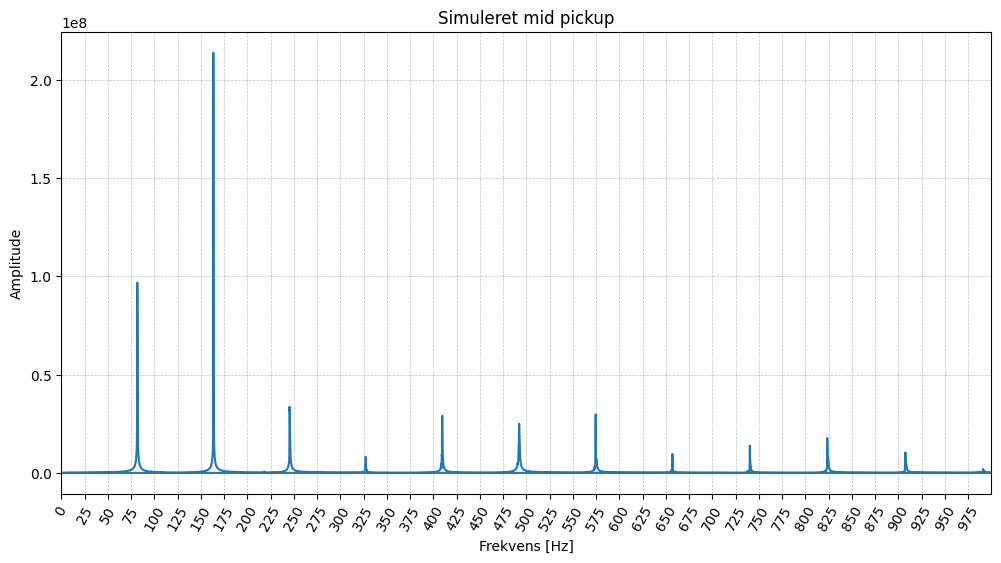

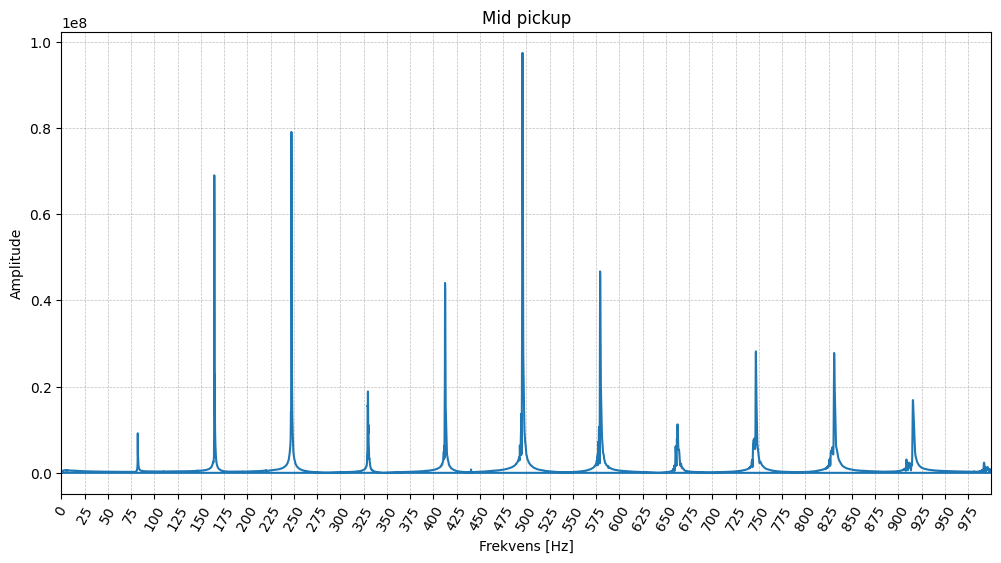

In [32]:
fft_sim_mid = (fft_bridge + fft_neck) / 2

plot_fft(fft_sim_mid, frequency, "Simuleret mid pickup")
plot_fft(fft_mid, frequency, "Mid pickup")

Lav lydfil

In [ ]:
sim_mid_audio_data = np.fft.ifft(fft_sim_mid).real
 #np.int16(time_domain_signal / np.max(np.abs(time_domain_signal)) * 32767)

normalized_sim = np.int16(sim_mid_audio_data / np.max(np.abs(sim_mid_audio_data)) * 32767)

wavfile.write("simulated_mid_raw.wav", neck_sample_rate, normalized_sim)